# Python Workshop 2025

I'm excited you chose this project! I think it's going to be a lot of fun, with plenty of room for you to try new things and explore what you want to explore. I have organized this notebook into different sections, which we will go through in order.

### Project abstract:
In soft matter physics experiments, it is often necessary to film the deformation or flow of an object in motion and quantify this motion; as one example, think about what it might look like to quantify the swirling flows on the fluid surface of a cup of coffee. In this project, you will be introduced to motion tracking techniques in Python such as:
- Import/export operations for images and videos
- Image processing techniques (identifying objects, applying filters, etc.)
- How to perform particle image velocimetry in Python

You will be asked to bring in your own short video to analyze, whether that be a video you take on your phone, or something you find online (it should look something like this: https://youtube.com/shorts/eIzCmnPCNzI?si=Qf5OwaN-Dhct6tlH). By the end of the project, you will be able to extract (and plot) relevant physical quantities from your video!

### Relevant Python libraries:
numpy, matplotlib, pandas, scipy, cv2, opencv, openpiv\
*library manager: Anaconda Navigator

### Platform:
Jupyter notebook and Spyder (both included with Anaconda)

# General resources/tips
- Jupyter notebook keyboard shortcuts: https://discourse.jupyter.org/t/most-useful-keyboard-shortcuts-for-notebook-lab/18113
    - To run cell: ```Cmd+Enter```
- If you want to de-activate a line of code, put ```#``` in front of it (this is also how you make an in-line comment)
- Tips and tricks for making nice plots with Matplotlib: https://matplotlib.org/cheatsheets/handout-tips.pdf
    - Also: https://www.kaggle.com/code/subinium/simple-matplotlib-visualization-tips
- Since we will be dealing with videos of a specific file type (```.mp4```), it may be handy to download this free video player which works for both Mac and Windows: https://www.videolan.org/vlc/

# **Step 0**: download relevant libraries
1. See this PDF for how to download most libraries thru Anaconda: https://uchicago.box.com/s/rkiw6yhlpyx0gu18tec4lvh88b8zxwit
2. There are a few libraries that you can't download in Anaconda Navigator. One such library we will be using is PIVlab, which you need to install manually.
    1. **Windows**: search "Anaconda prompt" in Finder to open the correct command line. Then run this command: ```conda install conda-forge::openpiv```
    2. **Mac**: in Anaconda Navigator, go the Environments tab, then click on the green arrow next to your base/root environment -- this should give you an option to open Terminal. Once you have the terminal open in this way, run this command: ```conda install conda-forge::openpiv```
  
TIP: Google is your best friend for learning Python, so if you are ever confused, don't be afraid to just *look it up*

## Next, import those libraries to this notebook so we can use them:
If you get an error like ```ModuleNotFoundError: No module named <xxx>``` then you may have forgotten to install that library (or may not have installed it properly).

It is important that your library import commands are the **first** commands you run, otherwise the rest of your code that references those libraries will not work.

TIP: you can run a cell with the following shortcut: for Windows/Mac, hit ```Cmd+Enter```.

In [1]:
import matplotlib.pyplot as plt # the "as" command allows you to abbreviate the library name if you want
import numpy as np
import pandas as pd
import cv2
import math
import skimage
from os import listdir # this is the syntax for importing a sublibrary
from openpiv import tools, validation, filters, scaling, pyprocess
from IPython.display import display

In [5]:
# your code here
# plz import the rest of the libraries you downloaded following the instructions linked above

# **Step 1**: importing and processing *images*

We will be using the ```cv2``` package to import images. See an example below:

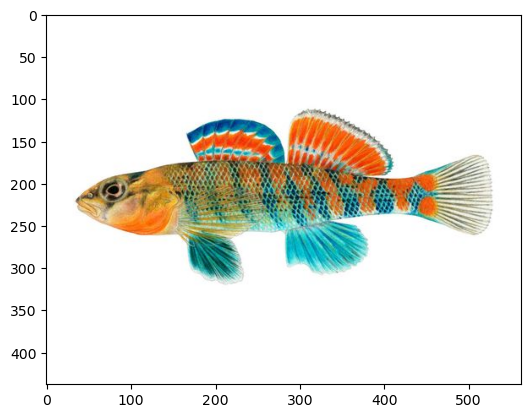

In [5]:
path_to_pic = r"C:\Users\slivermore\Downloads\fish.jpg" # <--- this is where you should add your own file path
img = cv2.imread(path_to_pic)
img = img[:,:,::-1] # this ensures the image is reading as RGB color
plt.imshow(img) # this is how you display the image in your notebook

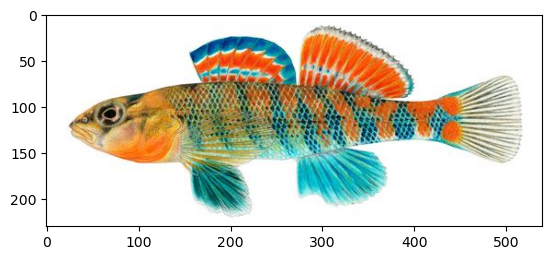

In [18]:
# we can crop an image like this:

img = img[100:330,10:550] # first give your y-limits, then x-limits
plt.imshow(img)

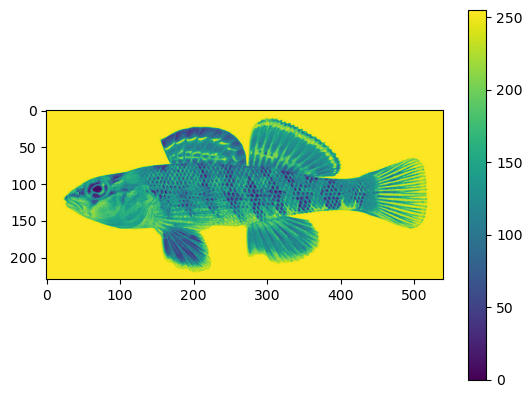

In [36]:
# let's change the image to be black and white

bw_img = cv2.imread(path_to_pic,0) # ignores color channels, just reads from black to white (0 to 255)
bw_img = bw_img[100:330,10:550] # first give your y-limits, then x-limits
plt.imshow(bw_img)
plt.colorbar() # this prints the colorbar, which shows which values correspond to which pixel intensity, from 0 to 255

In [6]:
# your code here
# try to import your image without the img[:,:,::-1] line, what happens?
# mess around with other cv2 commands
# can you figure out how to rotate your image? or to flip it?
# can you make the black and white image actually black and white, instead of yellow-purple?

This website explains the basic functions included in the ```cv2``` package: https://docs.opencv.org/4.x/d3/df2/tutorial_py_basic_ops.html

## What is image processing?
Basically it's just manipulating your image to extract the information you want from it. This can include increasing the contrast, blurring the image, changing the color filters, and more!

### Let's identify regions of high contrast in the image! 
Many of the functions below that we don't write ourselves come from the skimage library, look them up here: 
https://scikit-image.org/docs/stable/api/skimage.filters.html#skimage.filters.sobel

In [7]:
# import some more specific libraries/functions:

from skimage.filters import sobel_v,sobel
from skimage.filters.rank import median
from skimage.morphology import disk, ball
from skimage.morphology import remove_small_objects
from skimage.morphology import opening,closing
from scipy.ndimage import binary_fill_holes

Basically, the Sobel function below will calculate the gradient of pixel values along a specific direction and return the regions of highest ascent/descent according to the threshold you define. The smaller the threshold (called ```grad_thresh``` below), the larger your high-contrast regions will be.

In [22]:
# define a function that takes in an image and 
# finds areas of high contrast in the horizontal direction

def find_horizontal_edges_sobelmethod(img):
    img_blurred = median(img, disk(5)) # we blur the image first to smooth out any noise
    sobel_edges = sobel_v(img_blurred) # detect high contrast regions
    return img_blurred,sobel_edges

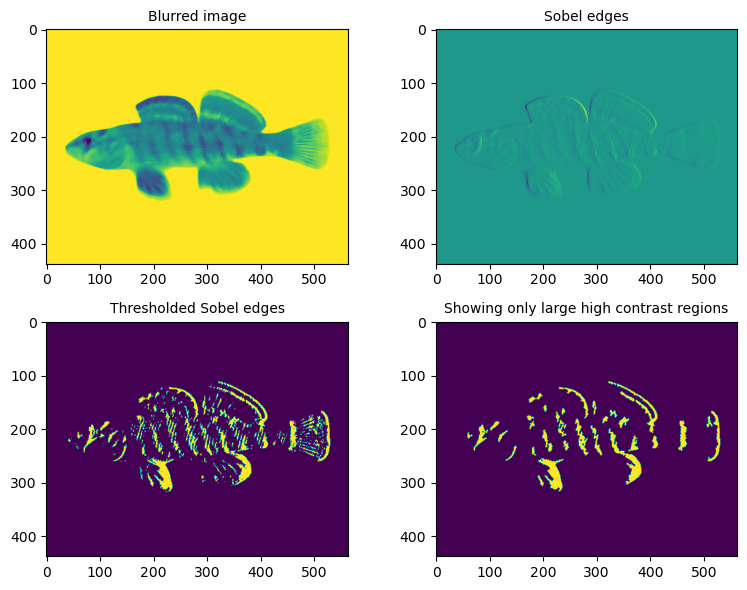

In [23]:
# now let's actually use those functions

path_to_pic = r"C:\Users\slivermore\Downloads\fish.jpg" # <--- this is where you should add your own file path
bw_img = cv2.imread(path_to_pic,0) # ignores color channels, just reads from black to white (0 to 255)
img_blurred,sobel_edges = find_horizontal_edges_sobelmethod(bw_img)
grad_thresh = 30 # gradient threshold, you can choose this value
thresh_img = sobel_edges > np.max(sobel_edges)/grad_thresh # only take the part of the image that survives your thresholding

fig,ax=plt.subplots(2,2,figsize=(8,6)) # this is how you make a figure with multiple subplots
ax[0][0].imshow(img_blurred) # this is plotting in the (0,0) subplot, aka. the top left panel
ax[0][1].imshow(sobel_edges)
ax[1][0].imshow(thresh_img)
ax[1][1].imshow(remove_small_objects(opening(closing(thresh_img)), 50))

ax[0][0].set_title('Blurred image',fontsize=10)
ax[0][1].set_title('Sobel edges',fontsize=10)
ax[1][0].set_title('Thresholded Sobel edges',fontsize=10)
ax[1][1].set_title('Showing only large high contrast regions',fontsize=10)

fig.tight_layout()

In [24]:
# your code here
# what happens if you don't blur the image before using the Sobel function on it? try it out
# does the Sobel function work if your image is not black and white? see if you can find an answer in the documentation

### Now let's detect some blobs

The code below comes from the example shown here https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_blob.html#sphx-glr-auto-examples-features-detection-plot-blob-py. In this example, our blobs are **galaxies**!

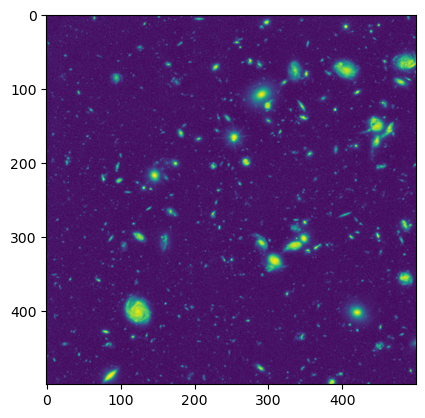

In [37]:
# import library just for this:
from skimage.feature import blob_dog, blob_log, blob_doh

# call public dataset from Hubble:
image = skimage.data.hubble_deep_field()[0:500, 0:500]
image_gray = skimage.color.rgb2gray(image) # needs to be black and white to work
plt.imshow(image_gray)

```doh``` below means "determinant of the Hessian" -- this is the fastest blob detection method in skimage
- See documentation here: https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.blob_doh
- Even more info here for those who are curious: https://www.kaggle.com/code/hughiephan/blob-detection-with-determinant-of-hessian

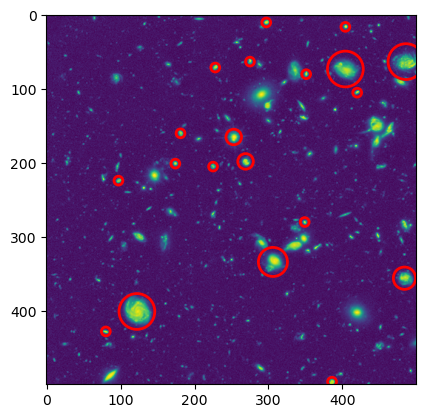

In [38]:
blobs_doh = blob_doh(image_gray, max_sigma=30, threshold=.02)
blobs_doh[:, 2] = blobs_doh[:, 2] * np.sqrt(2) # convert to a radius for plotting as a circle below

fig, ax = plt.subplots()
ax.imshow(image_gray)
for blob in blobs_doh: # here we iterate through the elements of blobs_doh (which is a list of blobs)
    y, x, r = blob
    c = plt.Circle((x, y), r, color='red', linewidth=2, fill=False) # draw a circle around the blob
    ax.add_patch(c) # add the circle to the plot
plt.show()

In [36]:
# your code here
# figure out how to change the blob detector code above to detect larger or smaller blobs 
# (hint: read the documentation linked above to figure out which variable to change)

# **Step 2**: importing and processing *videos*

Videos are just an array of images! Basically we add in a new dimension in time, but many of the methods from before will carry over.

Please **download** the video located here: https://uchicago.box.com/s/fvv09olh4i3k3zs66madgu00v9ivr8md. This is a video I found on YouTube at the following address: https://www.youtube.com/shorts/eIzCmnPCNzI?feature=share which happens to be a good example for us to work with.

### TIPS
- If your video import is not working, please double-check that your file extension is ```.mp4``` and that your file path is valid
- For more info on Pandas dataframes, see https://www.geeksforgeeks.org/python-pandas-dataframe/

In [58]:
# data path to mp4 video
data_path = r"C:\Users\slivermore\Box\Python workshop files Jan2025\example video.mp4" # <----- change this to match your file destination

# import video
print("Importing video from ",data_path)
video = cv2.VideoCapture(data_path) # import using the built-in cv2 function
frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT)) # count the number of frames in the video
frames_list = [] # open pandas df for frames

# Convert frame to image and save to file
for i in range(frame_count):
    ret, frame = video.read()
    if ret: # checking if the video exists
        if len(frame.shape)==3:
            frame = frame[:,:,0] # take black and white only
        frames_list.append(frame/255)

# Close video file
video.release()

Importing video from  C:\Users\slivermore\Box\Python workshop files Jan2025\example video.mp4


--------
We **can't play a video in the Jupyter notebook environment**, but we can examine individual frames from the video like so:

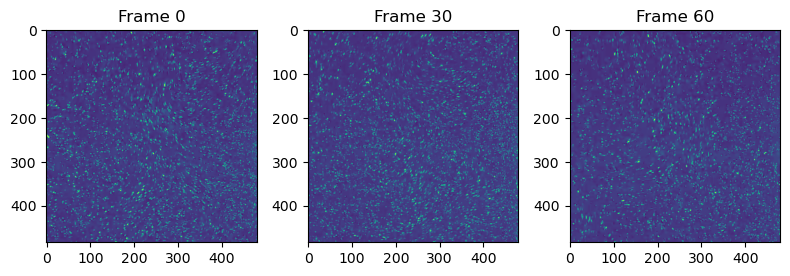

In [70]:
# preview a frame
fig,ax=plt.subplots(1,3,figsize=(8,3))

ax[0].imshow(frames_list[0])
ax[0].set_title('Frame 0')
ax[1].imshow(frames_list[int(frame_count/2)])
ax[1].set_title('Frame {:.0f}'.format(int(frame_count/2)))
ax[2].imshow(frames_list[-1])
ax[2].set_title('Frame {:.0f}'.format(frame_count))

fig.tight_layout()

# **Step 3**: how to do particle image velocimetry (PIV)

What is PIV? According to Wikipedia, "particle image velocimetry (PIV) is an optical method of **flow visualization** used in education and research". The simplest description of the PIV process is that you take in a video of some kind of flow, and then your program will correlate the motion between video frames by comparing consecutive frames pixel by pixel. As a result, you get a vector field as a function of time.
- **Please read** the 'Analysis' section of the Wiki: https://en.wikipedia.org/wiki/Particle_image_velocimetry
- See an example of PIV output here: https://www.youtube.com/shorts/1N7H17PZYP8?feature=share
- References used for this section:
    - https://hub.2i2c.mybinder.org/user/openpiv-openpiv-python-example-icis1z6m/notebooks/index.ipynb

In [71]:
# First we will define a function to import a video (.mp4) given a file path, same as in step 2
# Returns array of video frames

def import_video(filepath):
    video = cv2.VideoCapture(filepath) # import using the built-in cv2 function
    frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT)) # count the number of frames in the video
    frames_list = [] # open pandas df for frames
    
    for i in range(frame_count):
        ret, frame = video.read()
        if ret: # checking if the video exists
            if len(frame.shape)==3:
                frame = frame[:,:,0] # take black and white only
            frames_list.append(frame/255)
    video.release()
    
    return frames_list

First, take a look at the different parameters we must define and then send into our PIV function:

In [150]:
# you need to adjust each of these parameters to get a good fit

fps = 60               # frame rate of your input video, how many frames per second (fps)
scale = 1              # units of length per pixel, for instance, cm/px
window_size = 32       # units = pixels, interrogation window size in frame A
search_area_size = 36  # units = pixels, search area size in frame B
overlap = 17           # units = pixels, 50% overlap is usually good
threshold = 1.05
delta_time = 2/fps     # units = seconds, time interval between the two frames

Now we will define a function to correlate the motion between two images, frames A and B. This one is long, but please go through each line and try to understand what it does.

In [172]:
# Here we define our PIV method functions
# Portions of code written by Alice Pelosse

def PIV(frame_a,frame_b, delta_time, scale, window_size, search_area_size, overlap, threshold, v_max = None):

    # this chunk of code takes in your images and PIV parameters and calculates 
    # the 2D PIV vector field (u0,v0) and the signal-to-noise ratio (sig2noise)
    u0, v0, sig2noise = pyprocess.extended_search_area_piv(
        frame_a, frame_b,
        window_size = window_size,
        overlap = overlap, dt = delta_time,
        search_area_size = search_area_size,
        sig2noise_method = 'peak2peak')

    # find out what the maximum velocity is in (u0,v0), will be useful later
    if v_max == None:
        v_max = np.max(u0)
    
    # these are the locations of PIV mesh coords in units of pixels (px)
    x, y = pyprocess.get_coordinates(
        image_size = frame_a.shape, search_area_size = search_area_size, overlap = overlap)

    # this piece of code is not immediately useful, however if you define
    # a maximum allowable speed, these lines will pick out points that
    # are erroneously found to move faster than that limit
    for i in range(len(u0)):
        for j in range(len(u0[0])):
            if u0[i,j] > v_max:
                sig2noise[i,j] = 0
            if v0[i,j] > v_max:
                sig2noise[i,j] = 0

    # this code finds the untrustworthy points in the vector field (low sig2noise ratio)
    invalid_mask = validation.sig2noise_val(u0, v0, sig2noise, 
                                            threshold = 1.2)    # the higher your threshold, the more conservative you are in terms of
                                                                # what data is "trustworthy"

    # finds untrustworthy points in vector field (identifies points that are outside of a given standard deviation limit)
    invalid_mask2 = validation.global_std(u0, v0, 5)

    # this piece takes in one of the masks we defined and tries to recalculate the erroneous points
    u2, v2 = filters.replace_outliers(
        u0, v0, # these are the vector field components
        invalid_mask,
        method='localmean', # replaces the erroneous pts by calculating the mean of the
                            # neighboring points
        max_iter = 5, # smoothing parameter, higher number means more attempts to smooth
        kernel_size = 3) # defines the "neighborhood" of pts used to calculate the local mean
    
    # u2,v2 = filters.gaussian(
    #     u2, v2,
    #     1) # half_width 
    
    # convert from pixels and frame number to a real length scale and time
    x, y, u3, v3 = scaling.uniform(x, y, u2, v2, scaling_factor = scale)

    # transform coordinates to make things easier to plot
    # 0,0 shall be bottom left, positive rotation rate is counterclockwise
    x, y, u3, v3 = tools.transform_coordinates(x, y, u3, v3)
    
    # if you want to save the output arrays:
    # tools.save(x, y, u, v, mask, 'PIV_output.txt' )    # <---- this is the save command to store your PIV results, check the destination tho
    
    return (u0,u2,u3,v0,v2,v3) # returns raw vector field (u0,v0) as well as processed/filtered vector fields

Now we will actually call the PIV function and assign its outputs to various arrays:

In [173]:
# import video
data_path = r"C:\Users\slivermore\Box\Python workshop files Jan2025\example video.mp4" # <----- change this to match your file destination
frames_list = import_video(data_path)

# run PIV between two frames using the parameters we defined previously
start_frame = 0
delta_frame = 1 # how many frames do you skip between PIV iterations (sometimes this should be 1, sometimes will be larger)
frame_a = frames_list[start_frame]
frame_b = frames_list[start_frame + delta_frame]
u0,u2,u3,v0,v2,v3 = PIV(frame_a,frame_b, delta_time, scale, window_size, search_area_size, overlap, threshold, v_max = None)

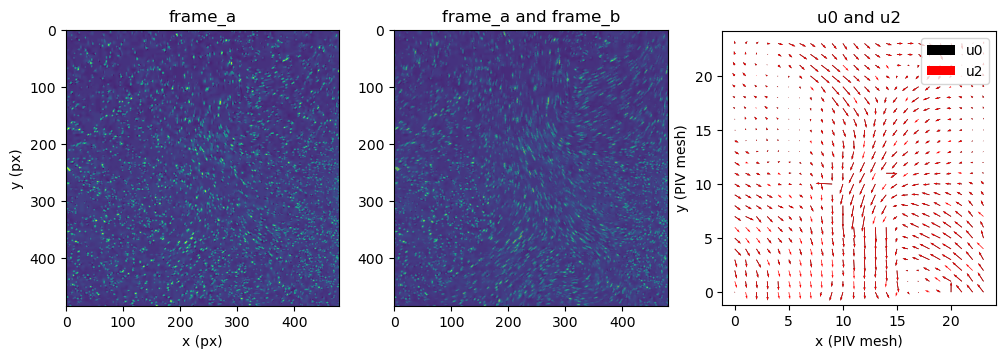

In [160]:
# Now let's plot our result!!

fig,ax=plt.subplots(1,3,figsize=(12,4))
ax[0].imshow(frame_a)
ax[1].imshow(frame_a)
ax[1].imshow(frame_b,alpha=0.5)

shrink_factor = len(frame_a)/len(u0) # convert from px to PIV mesh unit, might be handy later

# plt.gca().set_aspect('equal')
ax[2].quiver(u0,v0,color='k',label='u0')
# plt.gca().set_aspect('equal')
ax[2].quiver(u2,v2,color='r',label='u2')

for j in range(0,3):
    ax[j].set_aspect('equal')

ax[0].set_xlabel('x (px)')
ax[0].set_ylabel('y (px)')
ax[2].set_xlabel('x (PIV mesh)')
ax[2].set_ylabel('y (PIV mesh)')

ax[0].set_title('frame_a')
ax[1].set_title('frame_a and frame_b')
ax[2].set_title('u0 and u2')
ax[2].legend()

plt.show()

Note how the vector field in the right-most panel above shows the **displacement vectors** of each grid-square of the PIV mesh we defined. The magnitude of these vectors corresponds to the **flow rate** or speed at that point.

In [152]:
# your code here

# what happens if you change the number of frames between frame_a and frame_b? does the PIV get better or worse?

# what happens when you change the threshold parameter?

# or the window sizes?

# can you tell by eye which points in the vector field are probably errors?

In [153]:
# your code here

# try to write a function (which can use the functions we have already defined) that takes in a video
# and runs PIV over the whole video in a loop

# think about what a good way to view the resulting vector fields might be (for instance, save the images to a folder
# and turn them into a GIF)

# **Step 4**: optimizing video processing for good PIV

So we can perform PIV now, but it's not necessarily as pretty as it could be. Now we'll apply some of the image processing techniques from Step 1 to get the best PIV result we can.

In [162]:
# here we'll define a bunch of functions
# some code written with Alice Pelosse

# this function takes in an image and boosts the contrast
# by equalizing the histogram of pixel values
def enhance_contrast(img,k_size=50): # k allows you to adjust how coarse-grained this process is
    return equalize_adapthist(img,kernel_size=k_size)

# this function blurs the image and then calculates
# the horizontal gradient of that image
def img2grad_hor(img):
    img_blurred=median(img, disk(5))
    grad_hor=sobel_v(img_blurred)
    return img_blurred,grad_hor

In [163]:
# your code here

# modify the previous PIV code to use the "enhance_contrast" function above
# does your PIV result improve?

In [164]:
# your code here

# please go to the cv2 library documentation and find other image processing techniques to implement
# do these techniques improve or worsen your PIV output?

# **Step 5**: exporting PIV vector field as a video

Perhaps the most satisfying way to view your PIV results is to make a video showing the original frames and the PIV output; it's also a good way to sanity-check that the PIV makes sense. You'll do this below:

In [165]:
# your code here

# please modify your PIV loop function so that it stores (u2,v2) for every video frame

# then use matplotlib to generate a 2-panel figure at each timestep, where the left panel is the original video frame
# and the right panel is the PIV output

# store each figure to an array or save it as an image to your computer
# so that in the end you have an array of images of your matplotlib figure

Now, consult the internet/Python documentation to figure out how to take that photo array and turn them into a video. Here are a couple of possible resources (though there are many more):
- https://www.geeksforgeeks.org/python-create-video-using-multiple-images-using-opencv/
- https://stackoverflow.com/questions/43048725/python-creating-video-from-images-using-opencv

# **Step 6**: import your own unique video

You can either film a short video on your phone or find one online. Keep in mind what makes a good candidate for PIV:
- The video is relatively brief (so the code doesn't take 10 years to run)
- The resolution of the video is decent (if it's too grainy/blurry, the PIV will fail)
- There is some kind of flow behavior exhibited in the video (e.g. on the surface of a cup of coffee, a flock of birds in the sky, jet engine testing, go wild!)
- There are discernable *tracers* in the flow that the PIV algorithm can track (these don't have to be special fluorescent particles like we use in the lab, they could be pepper grains dropped on the surface of a cup of milk, for instance)

If you find your video online instead of filming it yourself, make sure to include the link to the original post here so that the original creator is credited.

In [171]:
# your code here

# import your video and process it using the techniques you learned previously

# perform PIV on your processed video, export the results in a useful format

# **Step 7**: extracting relevant data from PIV vector fields

Now that we have extracted the basic flow information from the raw video, we can examine this flow data in more detail. Think about what might be useful to calculate from the video! Things like:
- Maximum/minimum fluid speed as a function of time
- The distribution of vector magnitudes as a function of time
- Curl/divergence of the vector field
- Constant-speed isocontours along different axes
- How different is the filtered/repaired field (u2,v2) from the raw field (u0,v0)? Can you quantify this somehow in a plot?

In [166]:
# your code here

# pick 2+ of the quantities above and calculate them for your video

If you are feeling creative, there's also plenty of ways to spice up your PIV vector field output. Here are a couple of things to try (**optional**):
- Color-code each vector according to it's angular orientation or magnitude
- Plot your vector field as a colormap instead of vector grid

Some example resources for these include:
- https://www.geeksforgeeks.org/quiver-plot-in-matplotlib/#
- https://matplotlib.org/stable/gallery/images_contours_and_fields/quiver_demo.html#sphx-glr-gallery-images-contours-and-fields-quiver-demo-py

# More?